
# 1 | Imports 🚂

In [1]:
pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 2 | Read the Data 🐍

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [3]:
df = pd.read_csv('/Users/parkjisook/Desktop/jisook_self/eda/harry potter/harry_potter_reviews.csv')


In [18]:
df.head(100)

,user_id,user_sex,user_age,user_country,rating,comment,favourite_character,date
0,0,female,50,Germany,2.5,"""The transitions between scenes were awkward, ...",Severus Snape,2004-12-27
1,1,female,23,Spain,4.0,"""Severus Snape's role adds an intriguing layer.""",Severus Snape,2003-11-22
2,2,male,32,France,3.0,"""The pacing was a bit slow, but the characters...",Ron Weasley,2005-09-16
3,3,female,24,Turkey,4.5,"""Hagrid's love for magical creatures is heartw...",Rubeus Hagrid,2002-09-17
4,4,female,40,Spain,5.0,"""Neville Longbottom's courage is awe-inspiring.""",Neville Longbottom,2004-10-17
...,...,...,...,...,...,...,...,...
95,95,other,35,Finland,5.0,"""Dumbledore's wisdom shines through.""",Albus Dumbledore,2003-06-12
96,96,male,12,France,5.0,"""Captivating storyline with unexpected surpris...",Ron Weasley,2003-11-09
97,97,female,34,Finland,4.5,"""The magical duel scenes are well-executed.""",Severus Snape,2004-02-10
98,98,other,56,France,4.5,"""Neville Longbottom's character growth was ins...",Neville Longbottom,2005-03-25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              491 non-null    int64  
 1   user_sex             491 non-null    object 
 2   user_age             491 non-null    int64  
 3   user_country         491 non-null    object 
 4   rating               491 non-null    float64
 5   comment              491 non-null    object 
 6   favourite_character  491 non-null    object 
 7   date                 491 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 30.8+ KB


In [6]:
df.dtypes.value_counts()


object     5
int64      2
float64    1
Name: count, dtype: int64

# 3 | Explore the Columns 🏰


- user_id

In [7]:
print(df['user_id'].describe())

count    491.000000
mean     245.000000
std      141.883755
min        0.000000
25%      122.500000
50%      245.000000
75%      367.500000
max      490.000000
Name: user_id, dtype: float64


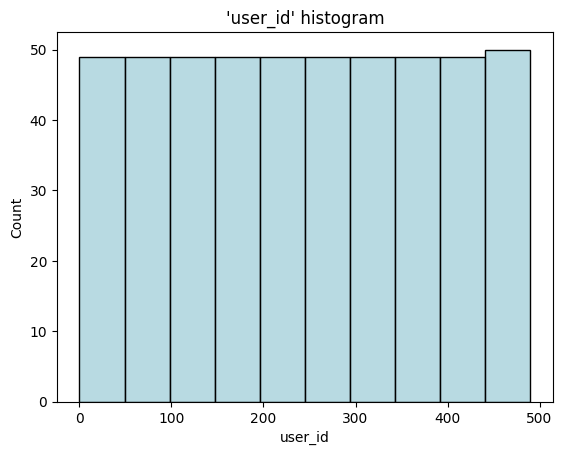

In [8]:
ax = sns.histplot(df['user_id'], color='#A0CED9')
_ = ax.set(title="'user_id' histogram")

- user_sex

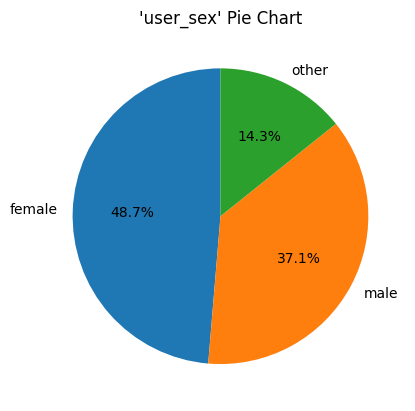

In [9]:
user_sex_counts = df['user_sex'].value_counts(normalize=True)

plt.pie(
    x=user_sex_counts.values,
    labels=user_sex_counts.index,
    autopct='%1.1f%%',
    startangle=90,
)
_ = plt.title("'user_sex' Pie Chart")

- user_age

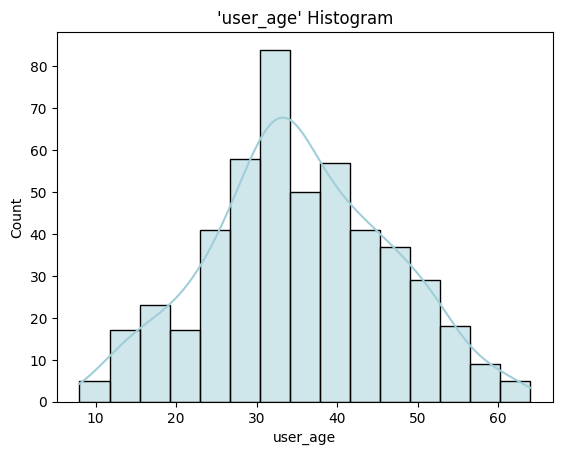

In [10]:
ax = sns.histplot(df['user_age'], color='#A0CED9', kde=True)
_ = ax.set(title="'user_age' Histogram")

- user_country

/var/folders/0k/b89zvlt92ls3p_60v_0kh9g00000gn/T/ipykernel_92859/2187665211.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(


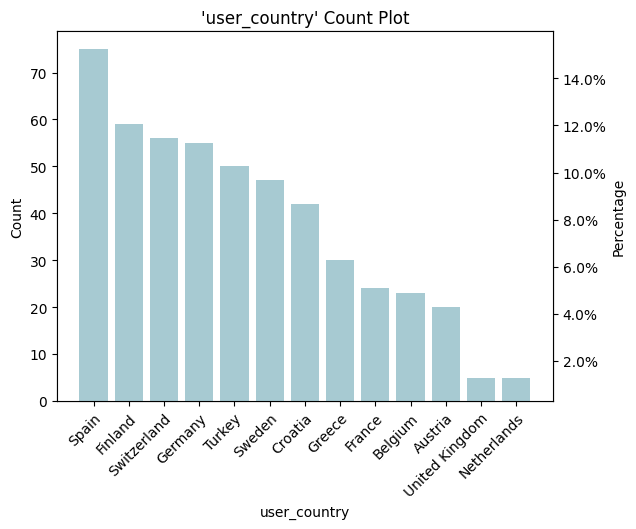

In [11]:
# Sort the list of unique countries by number of occurrences
sorted_countries = df['user_country'].value_counts().index

# Count Plot of the different countries in data
ax1 = sns.countplot(
    x=df['user_country'],
    color='#A0CED9',
    order=sorted_countries
)

# Create a second y-axis for percentages (%)
ax2 = ax1.twinx()

# Compute the pct of ocurrences of each country
pct_series = (df['user_country'].value_counts() / len(df)) * 100

# (Dummy) Plot to show percentages on the second y-axis
sns.lineplot(
    x=pct_series.index, 
    y=pct_series.values, 
    color='white',
    marker='o',
    ax=ax2
)
# Note that the actual lineplot's shape and form does not matter

# Send the dummy white percent plot to the back
ax2.set_zorder(1)
ax1.set_zorder(2)

# Rotate the Xlabels (45º, diagonal)
ax1.set_xticklabels(
    labels=sorted_countries,
    rotation=45, 
    ha='right',
    rotation_mode='anchor',
)
ax1.set_ylabel('Count')
ax2.set_ylabel('Percentage', color='black')

# Set the second y-axis to percentage
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add the title
_ = ax1.set_title("'user_country' Count Plot")

- rating

/var/folders/0k/b89zvlt92ls3p_60v_0kh9g00000gn/T/ipykernel_92859/2078652608.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(


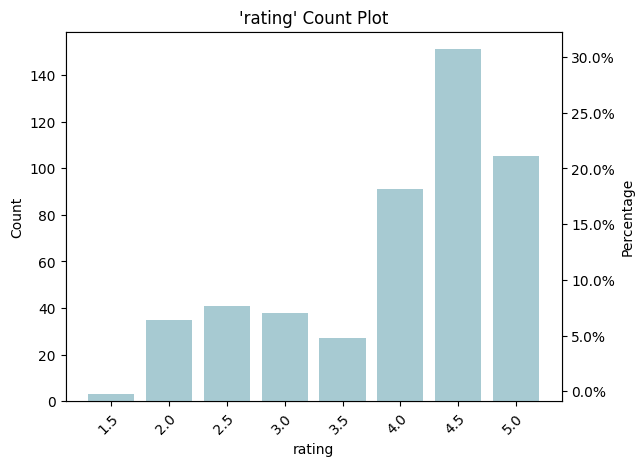

In [12]:
# Sort the list of ratings ascending
rating_labels = sorted(df['rating'].unique())

# Count Plot of the different ratings in data
ax1 = sns.countplot(
    x=df['rating'],
    color='#A0CED9',
    order=rating_labels
)

# Create a second y-axis for percentages (%)
ax2 = ax1.twinx()

# Compute the pct of ocurrences of each rating
pct_series = (df['rating'].value_counts() / len(df)) * 100

# (Dummy) Plot to show percentages on the second y-axis
sns.lineplot(
    x=pct_series.index, 
    y=pct_series.values, 
    color='white',
    marker='o',
    ax=ax2
)
# Note that the actual lineplot's shape and form does not matter

# Send the dummy white percent plot to the back
ax2.set_zorder(1)
ax1.set_zorder(2)

# Rotate the Xlabels (45º, diagonal)
ax1.set_xticklabels(
    labels=rating_labels,
    rotation=45, 
    ha='right',
    rotation_mode='anchor',
)
ax1.set_ylabel('Count')
ax2.set_ylabel('Percentage', color='black')

# Set the second y-axis to percentage
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add the title
_ = ax1.set_title("'rating' Count Plot")



- favorite_character

/var/folders/0k/b89zvlt92ls3p_60v_0kh9g00000gn/T/ipykernel_92859/787695710.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(


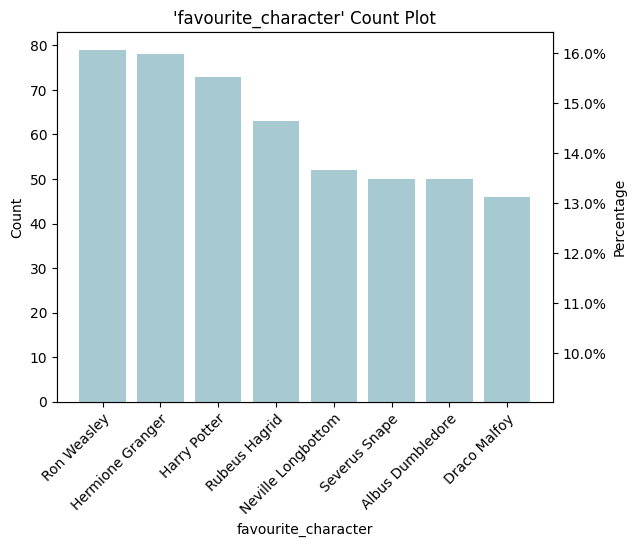

In [13]:
# Sort the list of characters by the number of occurrences
sorted_fav_chars = df['favourite_character'].value_counts().index

# (Sorted) Count Plot of the different characters in data
ax1 = sns.countplot(
    x=df['favourite_character'],
    color='#A0CED9',
    order = sorted_fav_chars
)

# Create a second y-axis for percentages (%)
ax2 = ax1.twinx()

# Compute the pct of ocurrences of each character
pct_series = (df['favourite_character'].value_counts() / len(df)) * 100

# (Dummy) Plot to show percentages on the second y-axis
sns.lineplot(
    x=pct_series.index, 
    y=pct_series.values, 
    color='white',
    marker='o',
    ax=ax2
)
# Note that the actual lineplot's shape and form does not matter

# Send the dummy white percent plot to the back
ax2.set_zorder(1)
ax1.set_zorder(2)

# Rotate the Xlabels (45º, diagonal)
ax1.set_xticklabels(
    labels=sorted_fav_chars,
    rotation=45, 
    ha='right',
    rotation_mode='anchor',
)
ax1.set_ylabel('Count')
ax2.set_ylabel('Percentage', color='black')

# Set the second y-axis to percentage
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add the title
_ = ax1.set_title("'favourite_character' Count Plot")


- date

In [14]:
# Turn 'date' column from 'object' to 'datetime'
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


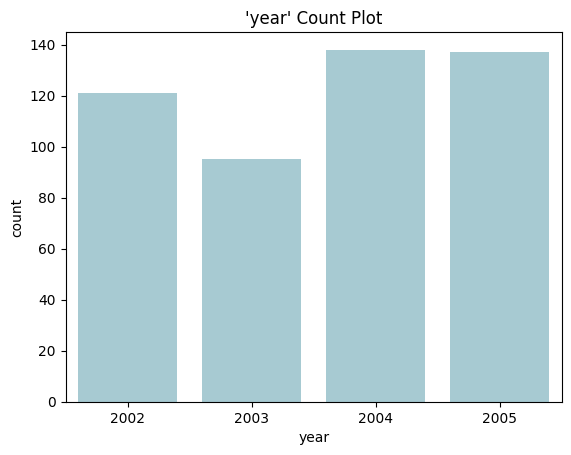

In [15]:
# Extract and visualize the month

ax = sns.countplot(
    x=df['date'].dt.year,
    color='#A0CED9',
)
_ = ax.set(
    title="'year' Count Plot",
    xlabel='year'
)


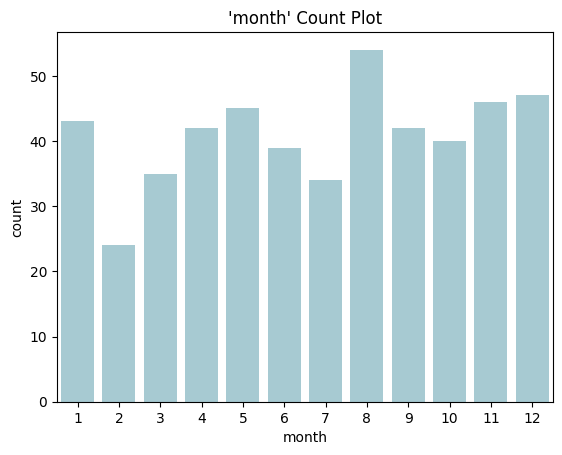

In [16]:
# Extract and visualize the month

ax = sns.countplot(
    x=df['date'].dt.month,
    color='#A0CED9',
)
_ = ax.set(
    title="'month' Count Plot",
    xlabel='month'
)

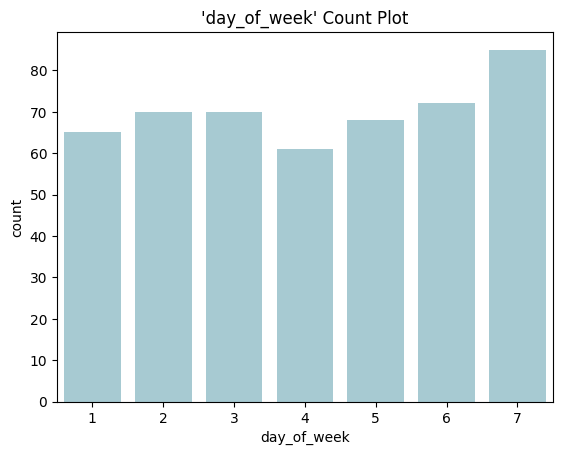

In [17]:
# Extract and visualize the day of the week

ax = sns.countplot(
    x=df['date'].dt.weekday + 1,
    color='#A0CED9',
)
_ = ax.set(
    title="'day_of_week' Count Plot",
    xlabel='day_of_week'
)

- 캐릭터&나이

/var/folders/0k/b89zvlt92ls3p_60v_0kh9g00000gn/T/ipykernel_92859/124662568.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=sorted_fav_chars, rotation=45, ha='right', rotation_mode='anchor')


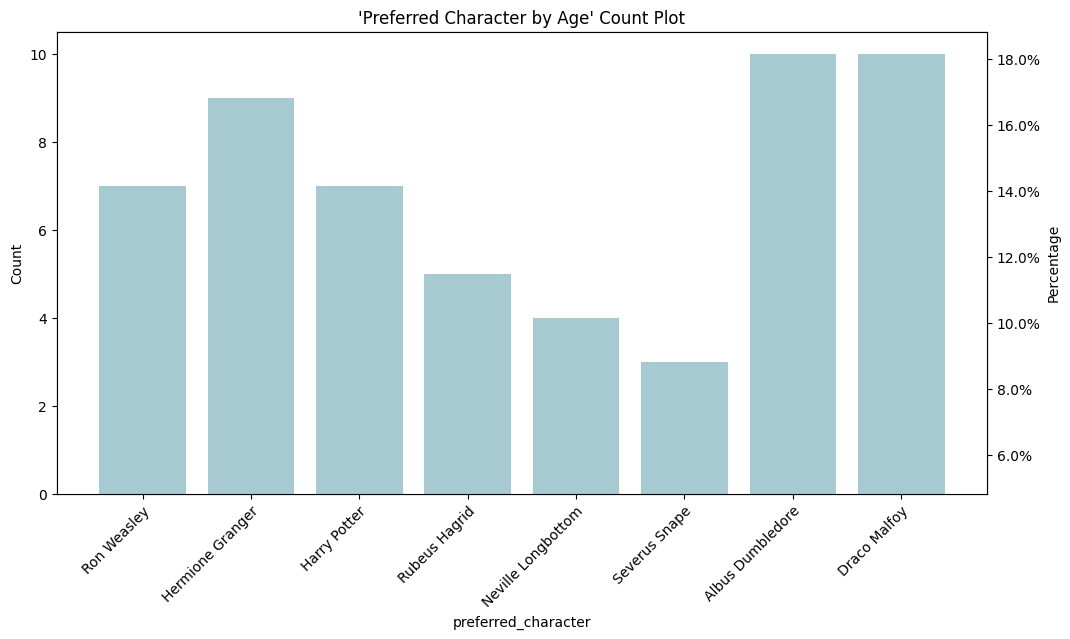

In [20]:


# 나이별로 캐릭터의 선호도를 계산합니다.
age_character_preference = df.groupby(['user_age', 'favourite_character']).size().unstack().fillna(0)

# 각 나이 그룹의 합이 0인 경우를 제외합니다.
age_character_preference = age_character_preference.loc[age_character_preference.sum(axis=1) > 0]

# 각 나이 그룹에서 가장 선호하는 캐릭터를 선택합니다.
preferred_characters_by_age = age_character_preference.idxmax(axis=1).reset_index(name='preferred_character')

# 나이별로 선호하는 캐릭터를 시각화합니다.
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(x=preferred_characters_by_age['preferred_character'], color='#A0CED9',
                    order=sorted_fav_chars)
ax2 = ax1.twinx()

# 각 나이 그룹의 비율을 계산합니다.
percentage_series = (preferred_characters_by_age['preferred_character'].value_counts() / len(preferred_characters_by_age)) * 100

# 백분율을 시각화합니다.
sns.lineplot(x=percentage_series.index, y=percentage_series.values, color='white', marker='o', ax=ax2)
ax2.set_zorder(1)
ax1.set_zorder(2)

# X 라벨을 회전합니다.
ax1.set_xticklabels(labels=sorted_fav_chars, rotation=45, ha='right', rotation_mode='anchor')

# Y 라벨을 설정합니다.
ax1.set_ylabel('Count')
ax2.set_ylabel('Percentage', color='black')

# 두 번째 y-축의 라벨을 백분율로 설정합니다.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# 제목을 추가합니다.
_ = ax1.set_title("'Preferred Character by Age' Count Plot")
plt.show()
